### Training For SMAP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.graphics.tsaplots import plot_acf
import glob
from sklearn.preprocessing import MinMaxScaler
import torch.nn as nn
# import torch
# from torch.utils.data import Dataset, DataLoader, TensorDataset
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
import random
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
from tabulate import tabulate

2026-01-15 14:04:57.431135: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
train_files = sorted(glob.glob("data/train/*.npy"))
train_series = [np.load(f) for f in train_files]

test_files = sorted(glob.glob("data/test/*.npy"))
test_series = [np.load(f) for f in test_files]

labels_df = pd.read_csv("data/labeled_anomalies.csv")

In [9]:
# Check how many files/channels you loaded
print(f"Loaded {len(train_series)} training files and {len(test_series)} testing files.")

# Check the shape of the first file
# Expected shape: (Timesteps, Dimensions)
print(f"Shape of first train series: {train_series[0].shape}")
print(f"Shape of first test series: {test_series[0].shape}")

Loaded 82 training files and 82 testing files.
Shape of first train series: (2880, 25)
Shape of first test series: (8640, 25)


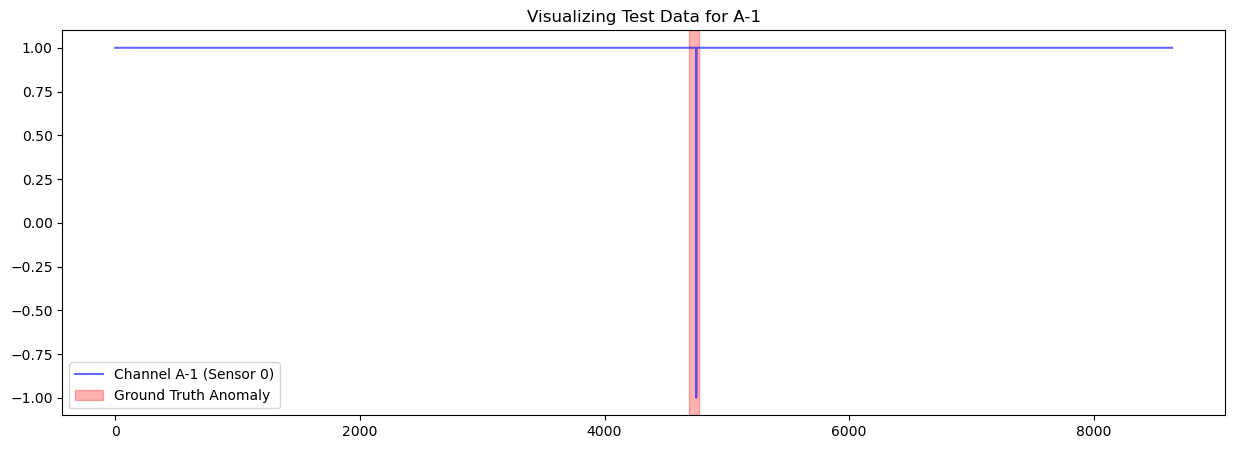

In [13]:
# Let's pick the first file in your list to visualize
file_index = 0
file_path = test_files[file_index]
# Extract the channel name (e.g., 'A-1' from 'data/test/A-1.npy')
chan_id = file_path.split('/')[-1].replace('.npy', '')

# Get the data for this channel
data = test_series[file_index]

# Find the anomaly labels for this specific channel
row = labels_df[labels_df['chan_id'] == chan_id].iloc[0]
anom_sequences = eval(row['anomaly_sequences']) # The CSV stores these as stringified lists

# Plotting
plt.figure(figsize=(15, 5))
plt.plot(data[:, 0], label=f'Channel {chan_id} (Sensor 0)', color='blue', alpha=0.6)

# Highlight the Ground Truth Anomalies
for seq in anom_sequences:
    start, end = seq
    plt.axvspan(start, end, color='red', alpha=0.3, label='Ground Truth Anomaly')

plt.title(f"Visualizing Test Data for {chan_id}")
plt.legend()
plt.show()